<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/fifa/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** Hotel Bookings
  
Last update: September, 2025

In [ ]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install --upgrade ydata-profiling

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from ydata_profiling import ProfileReport

/Users/lruales/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lruales/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Panadas configuration to extend the number of rows and columns to visualize by default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

### Load the data

In [3]:
# Loading the CSV file as a dataframe
reservas = pd.read_csv('./data/hotel_bookings_modified.csv')

/var/folders/tl/_hb9hygj6kxbfmb0l04swmq40000gq/T/ipykernel_9791/1840387268.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservas = pd.read_csv('./data/hotel_bookings_modified.csv')


In [4]:
# Showing the dataframe dimensions
print(reservas.shape)

# Showing the column data types
print(reservas.dtypes)

# Showing the top 5 rows
reservas.head(5)

(58895, 33)
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.00,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03,NaN


### Explore the *Categorical* columns

In [6]:
categorial_columns = ['hotel','is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','reserved_room_type','deposit_type','agent','company','customer_type','reservation_status']
total = reservas.shape[0]
print(total)
for column in categorial_columns
    frecuencias = reservas[column].value_counts()
    schema ={'Categoria' frecuencias.index,
         'Valor' frecuencias.values}
    
    df = pd.DataFrame(schema)
    
    df['Proporcion'] = df['Valor']/total
    print('Nombre atributo: ', column)
    print(df)
    print("-----------------------------------")

58895
Nombre atributo:  hotel
      Categoria  Valor  Proporcion
0  Resort Hotel  40063        0.68
1    City Hotel  18832        0.32
-----------------------------------
Nombre atributo:  is_canceled
   Categoria  Valor  Proporcion
0          0  34666        0.59
1          1  24229        0.41
-----------------------------------
Nombre atributo:  meal
   Categoria  Valor  Proporcion
0         BB  45060        0.77
1         HB  10096        0.17
2         SC   1780        0.03
3  Undefined   1169        0.02
4         FB    790        0.01
-----------------------------------
Nombre atributo:  country
    Categoria  Valor  Proporcion
0         PRT  27559        0.47
1         GBR   7595        0.13
2         ESP   5275        0.09
3         FRA   3037        0.05
4         IRL   2371        0.04
..        ...    ...         ...
136       BHR      1        0.00
137       BDI      1        0.00
138       SYR      1        0.00
139       UGA      1        0.00
140       GAB      1       

### Explore the *Cuantitative* columns

In [5]:

# Getting the main statistics for the Value column
reservas[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']].describe(include='all')

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,58895.00,58307.00,58895,58895.00,58895.00,58895.00,58895.00,58895.00,58891.00,58895.00,58895.00,58894.00,58306.00,58894.00
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.05,2205.52,NaN,27.84,15.77,1.06,2.85,1.97,0.11,0.14,0.24,3.53,0.10,0.51
std,101.16,1837.39,NaN,13.35,8.78,1.09,2.24,2.94,0.42,3.12,0.70,21.84,0.30,0.77
min,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00
25%,17.00,2016.00,NaN,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,69.00,2016.00,NaN,29.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,157.00,2016.00,NaN,38.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00


In [7]:
## Modificacion mes llegada
reservas['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [8]:
reservas['mes_llegada'] = reservas['arrival_date_month'].map(lambda x : datetime.strptime(x,'%B') if x!= None else 0)
reservas['mes_llegada'] = reservas['mes_llegada'].map(lambda x : datetime.strftime(x,'%-m') if x!= None else 0)
reservas['mes_llegada'].unique()

array(['7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [9]:
## Limpieza año llegada
reservas['arrival_date_year'].unique()

array([ 2015.,    nan, 20016.,  2016.,  2017.])

In [10]:
reservas['arrival_date_year'] = reservas['arrival_date_year'].map(lambda x: 2016 if x == 20016 else x)
reservas['arrival_date_year'].unique()

array([2015.,   nan, 2016., 2017.])

In [11]:
## Limpieza adultos
reservas['adults'].value_counts()

adults
 2      45712
 1      10610
 3       2225
 0        104
-1         99
 4         34
 66         6
 65         5
 26         5
 69         4
 91         4
 59         4
 54         4
 53         4
 95         3
 100        3
 79         3
 76         3
 84         3
 50         3
 72         3
 78         2
 73         2
 62         2
 52         2
 27         2
 86         2
 92         2
 80         2
 98         2
 56         2
 64         2
 55         2
 20         2
 60         2
 83         2
 5          2
 96         2
 51         2
 57         2
 68         2
 67         2
 77         1
 85         1
 87         1
 89         1
 40         1
 93         1
 58         1
 61         1
 63         1
 10         1
 6          1
 75         1
Name: count, dtype: int64

In [12]:
reservas = reservas[~reservas['adults'].isin([0,-1])]
reservas['adults'].value_counts()

adults
2      45712
1      10610
3       2225
4         34
66         6
65         5
26         5
54         4
53         4
91         4
59         4
69         4
79         3
84         3
100        3
76         3
95         3
50         3
72         3
78         2
73         2
62         2
52         2
27         2
86         2
92         2
80         2
98         2
56         2
64         2
55         2
20         2
60         2
83         2
5          2
96         2
51         2
57         2
68         2
67         2
77         1
85         1
87         1
89         1
40         1
93         1
58         1
61         1
63         1
10         1
6          1
75         1
Name: count, dtype: int64

In [13]:
## Limpieza babies
reservas['babies'].value_counts()

babies
 0      57892
 1        597
-1         90
 2          9
 51         6
 57         5
 77         5
 73         5
 81         4
 94         4
 56         4
 97         4
 65         4
 92         3
 59         3
 67         3
 61         3
 70         3
 66         3
 93         3
 100        2
 55         2
 78         2
 63         2
 99         2
 75         2
 53         2
 98         2
 69         2
 96         2
 71         2
 72         2
 58         2
 52         2
 82         2
 10         1
 83         1
 50         1
 91         1
 62         1
 60         1
 84         1
 89         1
 54         1
 95         1
 74         1
 88         1
Name: count, dtype: int64

In [ ]:
reservas = reservas[~reservas['babies'].isin([-1])]
reservas['babies'].value_counts()

In [15]:

reservas[['lead_time','arrival_date_year','mes_llegada','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']].describe(include='all')

,lead_time,arrival_date_year,mes_llegada,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,58602.00,58018.00,58602,58602.00,58602.00,58602.00,58602.00,58602.00,58598.00,58602.00,58602.00,58601.00,58015.00,58601.00
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.05,2015.97,NaN,27.84,15.77,1.06,2.85,1.98,0.11,0.14,0.24,3.52,0.10,0.51
std,101.17,0.69,NaN,13.34,8.78,1.09,2.24,2.95,0.41,3.12,0.69,21.84,0.30,0.77
min,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,2016.00,NaN,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,69.00,2016.00,NaN,29.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,157.00,2016.00,NaN,38.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
table = pd.pivot_table(reservas, values='D', index=['is_canceled','Fecha'],
                       columns=['C'], aggfunc="count")

In [31]:
df2 = reservas.groupby(['is_canceled','Fecha'])['hotel'].agg('count') #.reset_index()
df2.head(20)

is_canceled  Fecha     
0            2015-07-01    39
             2015-07-02    35
             2015-07-03    36
             2015-07-04    36
             2015-07-05    35
             2015-07-06    40
             2015-07-07    29
             2015-07-08    23
             2015-07-09    28
             2015-07-10    40
             2015-07-11    55
             2015-07-12    36
             2015-07-13    38
             2015-07-14    24
             2015-07-15    31
             2015-07-16    40
             2015-07-17    50
             2015-07-18    74
             2015-07-19    36
             2015-07-20    52
Name: hotel, dtype: int64

In [18]:
reservas['Fecha'] = pd.to_datetime({'year': reservas['arrival_date_year'], 'month': reservas['mes_llegada'], 'day': reservas['arrival_date_day_of_month']})

reservasFecha = reservas.groupby(['Fecha','is_canceled']).agg({ 'is_canceled': ['count']})
reservasFecha.head(5)

is_canceled
                             count
Fecha      is_canceled            
2015-07-01 0                    39
           1                     8
2015-07-02 0                    35
           1                    14
2015-07-03 0                    36

In [ ]:
reservas['lead_time'].hist()
plt.title('Histograma de Columna1')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

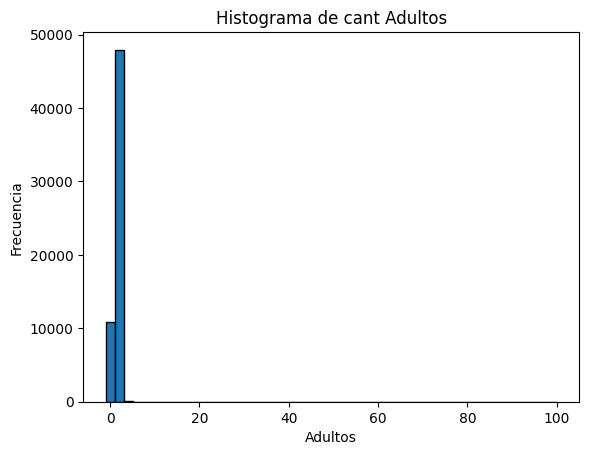

In [80]:
## Limpieza adultos
plt.hist(reservas['adults'], bins=50, edgecolor='black') 
plt.xlabel("Cantidad adultos")
plt.ylabel("Frecuencia")
plt.title("Histograma de cant Adultos")
plt.show()

<p style="color: red;">Modify the code above to show percentiles 95 and 99</p>

In [ ]:
# Computing skewness and kurtosis
print("Skewness:", fifa_df['Value'].skew())
print("Kurtosis:", fifa_df['Value'].kurtosis())

In [ ]:
# Plotting the histogram for the column
fifa_df['Value'].hist()
plt.show()

In [ ]:
# Defining the number of bins and for better visualization
plt.figure()
fifa_df['Value'].hist(bins=50)
plt.show()

In [ ]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(18, 3))
plt.boxplot(fifa_df['Value'], showmeans=True, vert=False)
plt.show()

In [ ]:
# Which are the most valuable players?
outlier_threshold = fifa_df['Value'].mean() + fifa_df['Value'].std() * 15
fifa_df[fifa_df['Value'] > outlier_threshold]

In [ ]:
# Using the method based on quartiles to select outliers
iqr = (fifa_df['Value'].quantile(.75) - fifa_df['Value'].quantile(.25))
outlier_threshold = fifa_df['Value'].quantile(.75) + iqr * 45
fifa_df[fifa_df['Value'] > outlier_threshold]

### Explore the *Preferred Positions* column

In [ ]:
fifa_df['Preferred Positions'].unique()

In [ ]:
# How many preferred positions the players have?

def count_pref_positions(x):
    positions = x.strip().split(' ')    # Split the text by space
    return len(positions)               # Count the number of positions and return the value

fifa_df['Preferred Positions'].apply(count_pref_positions).value_counts(dropna=False, normalize=True)

In [ ]:
# Selecting the preferred position with the highest score

def get_pref_position(row):
    pref_positions = row['Preferred Positions'].strip().split(' ')    # Split the text by space
    if pref_positions[0] == "GK":                                     # Handle the special case for GKs
        return "GK"
    scores = np.array([row[p] for p in pref_positions])               # Get the the scores for each preferred position
    i_max = np.argmax(scores)                                         # Get the index for the highest score
    return pref_positions[i_max]                                      # Locate the position using its index and return it

fifa_df['Preferred Position'] = fifa_df.apply(get_pref_position, axis=1)

In [ ]:
# Calculating the absolute frecuency of the preferred position
pref_positions_abs_frec = fifa_df['Preferred Position'].value_counts(dropna=False)
pref_positions_abs_frec

In [ ]:
# Plotting preferred position frecuency
# WARNING: line chart assumes continuity. It is a better choice when dealing with continuous variables (e.g. time series)
pref_positions_abs_frec.plot()
plt.show()

<p style="color: red;">Use a bar chart to better visualize the preferred position frecuency</p>

### Explore the relationship between *Age* and *Value*

In [ ]:
# Plotting a scatter plot to visualize two quantitative variables
plt.figure(figsize=(13, 7))
plt.scatter(fifa_df['Age'], fifa_df['Value'], alpha=0.5)
plt.title('Age vs. Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Age', 'Value']].corr()

In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Age', 'Value']].corr('spearman')

### Explore the relationship between *Overall* and *Value*

In [ ]:
plt.figure(figsize=(13, 7))
plt.scatter(fifa_df['Overall'], fifa_df['Value'], alpha=0.5, color='orange')
plt.title('Overall vs. Value')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [ ]:
# What is the (linear) correlation coefficient?
fifa_df[['Overall', 'Value']].corr()

In [ ]:
# What is the (monotonic) correlation coefficient?
fifa_df[['Overall', 'Value']].corr('spearman')

<p style="color: red;">Why both methods give different correlation coefficients for the same pair of variables?</p>

### Compare by *Club*

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(13, 10))
sns.boxplot(
    data=fifa_df.loc[fifa_df['Club'].isin(['Real Madrid CF', 'FC Barcelona'])],
    x='Club',
    y='Wage',
    showmeans=True
)
plt.show()

In [ ]:
# Plotting Wage by club
plt.figure(figsize=(13, 10))
sns.boxplot(
    data=fifa_df.loc[fifa_df['Club'].isin(['Independiente Santa Fe', 'CD Los Millionarios Bogota'])],
    x='Club',
    y='Wage',
    showmeans=True
)
plt.show()

<p style="color: red;">What are the main origins (Nationality) of the players in the top 3 teams with the most expensive squads (Value)? Hint: You need to group the data first.</p>

### Profiling the data

In [ ]:
profile = ProfileReport(fifa_df)

In [ ]:
# profile.to_notebook_iframe()

In [ ]:
# profile.to_file('report.html')

### Exporting clean date

In [ ]:
fifa_df.to_csv('./data/fifa_clean.csv', index=False)